# Problem plecakowy

## Opis projektu

### Sformułowanie problemu
Dyskretny problem plecakowy jest to problem maksymalizacyjny wyboru przedmiotów, gdzie:

* każdy przedmiot ma wagę
* każdy przedmiot ma wartość
* plecak ma ograniczoną pojemność
* celem jest wybranie podzbioru indeksów przedmiotów tak by wartość przedmiotów w plecaku była największa i waga mieściła się w ograniczeniach.

Nasze parametry problemu
* pojemność plecaka: 3
* ilość przedmiotów dla poszczególnych problemów: {16, 17, ..., 24}
* wagi:  $ \forall w \{w\in\mathbb{R} : 0\leq w \leq 1\}$
* wartości:  $ \forall v \{v\in\mathbb{R} : 0\leq v \leq 1\}$


### Motywacja
Motywacjami analizy tego problemu są:
* Łatwość jego zdefiniowania i zrozumienia.
* Łatwość w ocenie rezultatu.
* Rozwiązania do tego problemu mają szerokie zastosowania praktyczne.
* Funkcja rozwiązanie zawiera wiele minimów lokalnych, przez co warto na nim porównywać algorytmy uczące.
* Nauka metod stochastycznych uczenia maszynowego.

## State of the art

## Opis rozwiązania

### Brute Force

Brute Force to prosty najprostsze podejście do rozwiązania zadanego problemu. Przy $n$ elementach do wyboru, będzie $2^n$ kombinacji przedmiotów w plecaku [3]. Wśród przygotowanych rozwiązań wybiera się najlepsze rozwiązanie spełniające założenia. To rozwiązanie daje najlepsze możliwe wyniki ale kosztem długiego czasu wykonania.

Pseudokod:


1) all_possible_combinations_of_items = $\langle0,2^n)$
2) score = for each combination in all_possible_combinations_of_items: return sum(combination_values) if weight <= backpack_capacity else -1
3) get item combination for best evaluation



### Greedy Search Algorithm (GSA)

Programowanie zachłanne często stosowane jest w problemach optymalizacyjnych. Zazwyczaj wykorzystuje ono pewną heurystykę lub zdroworozsądkową wiedzę, aby generować sekwencję suboptimów, które powinny zbiegać się do wartości optymalnej.

Istnieją różne strategie rozwiązywania dyskretnego problemu plecakowego algorytmem GSA:
1. Posortuj i wybierz przedmioty do plecaka zaczynając od przedmiotu o najlepszym stosunku wartości ${v}$ do wagi ${v}$.<br>
      $h = \frac{v}{w}$.<br>
2. Posortuj i wybierz przedmioty do plecaka zaczynając od przedmiotu o największej wartości.<br>
3. Posortuj i wybierz przedmioty do plecaka zaczynając od przedmiotu o najniższej wadze.

Jeżeli ${k}$ jest maksymalną wartością przedmiotów w optymalnie upakowanym plecaku, algorytm GSA daje wartości nie gorsze niż $\frac{k}{2}$. Złożoność obliczeniowa algorytmu zależy od sortowania, tpowo $O(n\cdot log n)$ [4].

Pseudokod:<br>
n - liczba przedmiotów <br>
Oblicz stosunki ${r_i}$ wartości ${v_i}$ do wagi ${w_i}$
${r_i} = \frac{v_i}{w_i}, i = 1, ..., n.$<br>

    for all items do 
      if the current item on the list fits into the knapsack then
        place item in the knapsack
      else 
        proceed to next item



### Dynamic Programming (DP)
 W ogólności programowanie dynamiczne jest używane w problemach wymagających decyzji zależnych od siebie. Ułatwiamy decyzję przez rozbicie problemu w sekwencje łatwiejszych decyzji.

Programowanie dynamiczne jest techniką rozwiązania problemów, których rozwiązania spełniają zależności rekurencyjne z mniejszych nakładających się problemów (decyzji). DP rozwiązuje każdy z mniejszych podproblemów tylko raz i zapisuje wyniki w tabeli. Następnie, przygotowana tabela, wykorzystywana jest do uzyskania rozwiązania postawionego problemu. Klasyczne podejście do DP działa na zasadzie bottom-up [3].

Do rekurencyjnego rozwiązania wymagane jest zdefiniowania rozwiązania zerowego. Niech $w_1, …, w_n$ będą wagami poszczególnych przedmiotów oraz $v_1, …, v_n$, ich wartościami. Algorytm ma zmaksymalizować sumę wartości elementów przy zachowaniu sumy ich wagi mniejszej bądź równej $W$. Niech $A(i, j)$ będzie największą możliwą wartością, która może być otrzymana przy założeniu wagi mniejszej bądź równej $j$ i wykorzystnaiu pierwszych $i$ elementów. $A(n, W)$ jest rozwiązaniem problemu [4].

Definicja rekurencyjna $A(i, j)$: <br>
$A(0, j) = 0$<br>
$A(i, 0) = 0$<br>
$A(i,j) = A(i-1,j)$,  jeżeli $w_i > j$ <br>
$A(i,j) = max(A(i -1,j),v_i + A(i-1,j-w_i))$,  jeżeli $w_i \leq j$

Rozwiązaniem problemu jest wynik dla $A(n, W)$. Do efektywnego wykonania algorytmu używa się tablicy do zapamiętywania obliczonych podproblemów. Złożoność obliczeniowa wynosi $Θ(nW)$, podobnie jak złożoność pamięciowa. [4].

W przygotowanej implementacji istnieje tablica $[i,j]$ przechwoujaca optymalne wartości rozwiązań kolejnych podproblemów (przechowuje wartości najbardziej wartościowych podzbiorów pierwszych elementów które mieszczą się w plecaku o pojemności $j$). Ostatnia wartość tablicy czyli $[N, pojemność]$ zawiera optymalne rozwiązanie problemu.

*** DO ZREWIDOWANIA ***

### Memory Functions
Funkcje pamięciowe na zasadzie top-down rozwiązują tylko niezbędne podproblemy. Działają rekurencyjnie podobnie jak DP i tutaj też przechowywana jest tabela przechowująca wyniki. Początkowo jest ona wypełniona pustymi wartościami aby wskazać, że nie zostały jeszcze obliczone. Metoda sprawdza czy wartość w potrzebnej komórce tabeli została już obliczona. Jeżeli nie, to jest ona obliczana rekursywnie i zapisaywana w tabeli [3].

Funkcje pamieciowe są lepsza implementacją rekurencyjną niż dynamiczne programowanie ponieważ rozwiązują (obliczają) podproblemy wyłącznie wymagane do rozwiazania całego problemu jednakże wymagają większej ilości pamięci.


*** DO WYRZUCENIA? ***

### Branch and Bound (BB)
Algorytm Branch and Bound jest wykorzystywany do znalezienia rozwiązań optymalnych zachowywując najlepsze znalezione do tej pory rozwiązanie. BB konstruuje kolejne rozwiązania (kandydatów) pojedyńczo i ocenia częsciowo skonstruowane rozwiązania. Jeżeli częściowe rozwiązanie nie poprawia aktualnie optymalnego rozwiązania to jest ono porzucane. 

Branch and Bound to technika używana w rozwiązywaniu problemów opymalizacji. Jest ona nieco "lepsza" od metod wyczerpujących (exhaustive), ponieważ dokonuje oceny już częściowo pryzgotowanych rozwiazań, a jeżeli potencjalne pozostałe rozwiazania ne generują lepszych wyników, wtedy są pomijane.
W najgorszym przypadku B&B ma wykładniczą złożoność i wygeneruje wszystkie możliwe kombinacje liści. Wtedy drzewo będzie kompletne i będzie zawierało $2^{n-1}-1$ odgałęzień. Mimo to przeważnie i tak będzie lepszym wyborem niż sprawdzanie wszystkich możliwych rozwiązań metodą Brute Force.

B&B bazuje na drzewie przestrzni stanów, gdzie każdy kolejny poziom reprezentuje ścieżki dążące od lisci do korzenia i zaweirające rozwiazania. Przy czym korzeń (poziom 0) to punkt startowy bez żadnego rozwiązania. 

W przypadku problemu plecakowego 0-1 przy $N$ dostepnych przedmiotach $k$-ty poziom reprezentuje stan z którego wybierane jest rozwiązanie (wybrane zostały przedmioty lub nie). To daje $2^{k}$ gałęzi na $k$-tym poziomie drzewa, a liście znajdują się na poziomie $N$.


W drzewie przestrzeni stanów lewe odgałęzienie powinno oznaczać użycie kolejnego przedmiotu, a prawa gałąź jego wykluczenie.

Obliczana górna granica ($Upper Bound$) obliczana jest na zasadzie dodawania wartości obecnego podzbioru przedmiotów oraz pozostałej pojemności plecaka wymnożonej przez najlepszy kolejny przedmiot:

$Upper Bound = v + (Capacity - w)\cdot (\frac{v_i+1}{w_i+1})$

Przed uruchomieniem algorytmu wszystkie przedmioty powinny być posortowane w stosunku wartość ($v$) - waga ($w$): 
$\frac{v}{w}$.

Możliwe są 2 implementacje algorytmu B&B: 
1. wybieranie gałęzi z najmniejszą wartością graniczną. Ten sposób sprawdza mniej możliwości, a co za tym idzie zajmuje mniej czasu, ale wymaga więcej pamięci.
2. wybieranie gałezi z najmniejszą wartością graniczną z nowo utworzonych gałęzi. Ten sposób wymaga mniej pamięci ale więcej możliwych rozgałęzień co wydłuża jego czas pracy.

Zastosowany algorytm implementuje metodę nr 1.

Pseudokod:

    Create root state as empty branch.
    Calculate upper bound

    Using a heuristic, find a solution x_i
    If new solution is better than best then
        set new solution as best
        
    Initialize queue to the partial solution with none of the variables
    Loop until the queue is empty
        take node N off the queue
        if N represents single candidate solution x and f(x) < Best then
            record it and set f(x) as Best
        else
            branch on N produce new Nodes N_i
        
        for each of these do
            if g(N_i) > best do 
                nothing
            else
                store N_i on the queue
           
    

### Genetic Algorithm (GA)

Algorytm g enetyczny jest heurystycznym algorytmtm wyszukiwania i optymalizacji inspirowany nauką o ewolucji. GA zaczyna się od zbioru rozwiazań (chromosomów) czyli populacji. Nowa populacja tworzona jest z rozwiązań starej populacji z nadzieją na to, że będzie ona lepsza. Rozwiązania wybierane do tworzenia nowych rozwiązań (potomstwa) są selekcjonowane w zależności od ich funkcji przystosowania. Im osobnik daje lepsze rozwiązanie tym ma większe szanse na reprodukcję. Proces powtarza się aż do spełienia określonego warunku.

Główne elementy GA to [1]:

1. kodowanie chromosomów - chromosomy są łańcuchową reprezentacją rozwiązań danego problemu. Dla problemu plecakowego wykorzustuje się kodowanie binarne, w którym każdy chromosom ma wartość 0 lub 1. 
2. funkcja fitnesu - jest to funkcja która ocenia jakość chromosomu w konkretnym problemie. Funckja fitnesu przypisuje wartość każdemu chromosowomi populacji.
3. selekcja - chromosomy wybierane są do rekombinacji na podstawie funkcji fitensu. Dokonuje się tu oceny aktualnych członków populacji i wybierany jest podzbiór z najlepszymi jej wartościami, które będa rodzicami następnego pokolenia. Chromosomy z wyższą wartością fitnesu mają większą szansę na wybór niż te o niższych wartościach.
4. krzyżowanie - krzyżowanie pobiera pary chromosomów, które zostały wybnra e z procesu selekcji. Pary są łączone razem i generowane są nowe osobniki do populacji. Idea jest taka, aby mieszać materiał genetyczny rozmnażających się osobników. Potomwstwo tworzy się przez wymianę genów rodziców aż do wykonania pełnego krzyżowania.
5. mutacja - mutacja daje prawdpodobieństwo, aby pewna cecha (cechy) nie były dziedziczone po rodzicach, a zyskały inną wartość. To utrzymuje różnorodność genetyczną w kolejnych pokoleniach. Mutacja przerzuca bity z 0 na 1 i z 1 na 0.

GA ma pewne wady:
- trudno wymyślić dobrą heurystukę, odzwierciedlającą to co algorytm ma wykonywać,
- GA nie zawsze znajduje dokładne rozwiązanie, ale zawsze znajduje najlepsze,
- algorytm jest kosztowny obliczeniowo (czasochłdonny)
- GA wymaga mnuiej informacji o problemie ale zaprojektowanie funkcji celu, uzyskanie odpowiedniej reprezentacji i operatorów może być trudne

Pseudokod:
```
Randomly initialize populations
Determine fitness of population
Untill convergence repeat:
      a) Select parents from population
      b) Selection
      b) Crossover
      c) Mutation
      d) Calculate fitness for new population
```

Selekcje:<br>
Metoda koła ruletki - Każdemu chromosomowi przydzielono wycinek koła ruletki o wielkości proporcjonalnej do wartości funkcji fitnes. Całe koło ruletki odpowiada sumie wartości funkcji fitnes wszystkich chromosomów rozważanej populacji. Następnie wybieramy poprzez losowanie chromosomy.<br>
Selekcja turniejowa - Losowy podział chromosomów na grupy turniejowe, z których wybierany jest osobnik z najwyższą funkcją fitnes. Losowanie grup oraz wybór najlepszego osobnika należy powtórzyć aż do utworzenia nowej populacji.<br>
Krzyżowanie:<br>
Single point crossover - Losowany jest indeks, a następnie wybierana jest część z pierwszego chromosomu do indeksu oraz od indeksu do końca drugiego chromosomu. Z dwóch części tworzony jest nowy chromosom.<br>
Mutacje:<br>
Bit flip mutation - Losowany jest przynajmiej jeden bit z chromosomu, a następnie ustawiany jest jako przeciwny.<br>
Two point mutation - Losowane są dwa bity z chromosomu, które są zamieniane na przeciwne.<br>

### Simulated Annealing (SA)

Simulated Annealing (SA) jest stochastycznym algorytmem do znajowania globalnych ekstremów w dużyc problemach optymalizacyjnych. Wykorzystuje się go bardzo często w problemach optymalizacji wartości dyskretnych.

SA przy każdej iteracji generuje nowy stan, bazujący na obecnym, w którym zmienia losowo jeden (lub wiele) bit. Następnie porównywane są wartości nowego i obecnego stanu. Jeżeli wartości nwoego stanu są lepsze od poprzedniego i są akceptowalne (nie przekraczają limitu wagi) są akceptowane. Jeżeli nowo wygenerowany stan jest błędny, poniewaz przykładowo przekracza maksymalną wagę to wciąż może zostać wykorzystany w następnej iteracji z pewnym prawdopodobieństwem. Takie podejście pozwala algorytmowi wychodzić z minimów lokalnych.

Do poprawnej pracy algorytmu definiuje się stan początkowy jako pusty plecak oraz parametry wyżarzania, na podsawie których osiągany jest warunek stopu.

Zastosowana implementacja algorytmu symulowanedo wyżarzania:
Reprezentacja: wykrzostywana jest reprezentacja bunarna, gdzie wartość 1 wskazuje na umiesczenie przedmiotu w plecaku, a wartość 0 na jego brak.
Generacja nowego stanu: nowy stan generowany jest jako prawdopdobieństwo odwrócenia każdego bitu z osobna i uzupełnienie danego plecaka do maksymalnej pojemności.
Warunek stopu: algorytm zatrzymuje pracę kiedy temperatura zostanie obniżona poniżej temperatury zamrożenia.

Parametry początkowe:<br>
Temperatura początkowa = 2500<br>
Wychładzanie = 0.99

Pseudokod:

    Initialize parameters of the annealing schedule
    Generate initial state as current state
    
    While temperature is greater than frozen level do
        generate next state
        
        if next state is better than current state do
            set current state as next state
            if current state is better than best state
                set best state as current state
        else
            calculate acceptance value for next state
            if acceptance value is greater than random between 0 to 1 do
                set current state as next state
                
        lower temperature
    

### SA + GA
Aby poprawić jakość rozwiązań uzyskiwanych przez osobne implementacje algorytmów symulowanego wyżarzania oraz algorytmu genetycznego stosuje się podejście hybrydowe. Zadaniem SA jest udoskonalenie rozwiązania uzyskanego przez GA. Jest to osiągane poprzez przeszukiwanie okolicy najlepszego chromosomu z populacji z danej generacji GA. Wiele implementacji stosuje to hybrydowe podejście dla każdego osobnika z populacji, jednakże w przygotowanym algorytmie stosuje się ono wyłacznie do najlepszego osobnika z populacji, gdyż stosowanie go do większej ilości chromosomów jest kosztowne obliczeniowo oraz spora część populacji nie jest wybierana do krzyżowanaia.

Zastosowane rozwiązanie łączy eksplorację rozwiązań z GA oraz eksploatację z SA.

Parametry początkowe GA są identyczne jak w jego podstawowej implementacji.<br>
Parametry początkowe SA:<br>
Temperatura początkowa = 2100<br>
Wychładzanie = 0.96

Pseudokod:

    Initialize population
    while max iteration reached or 90% of convergence reached or max stale iterations reached do
        calculate scores for each chromosome
        improve best chromosome with SA
        
        ...
        normal GA algorithm
        ...

## Analiza wyników

In [ ]:
from pandas import read_csv, concat

<AxesSubplot:title={'center':'Result for correlated data'}, xlabel='Items', ylabel='Value'>

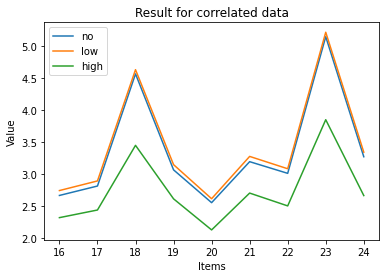

In [ ]:
df_GSA = read_csv("Results//GSA.csv", index_col=0)
df_GSA.plot(title="Result for correlated data", xlabel="Items", ylabel="Value")

In [ ]:
df_GSA.head(9)

,no,low,high
16,2.661599,2.738031,2.315148
17,2.808765,2.888327,2.434386
18,4.559461,4.625127,3.443843
19,3.061225,3.142394,2.608845
20,2.548946,2.610442,2.123553
21,3.188891,3.271083,2.698742
22,3.006683,3.078406,2.498366
23,5.140295,5.209513,3.844052
24,3.265841,3.336987,2.659636


<AxesSubplot:title={'center':'Result for correlated data'}, xlabel='Items', ylabel='Value'>

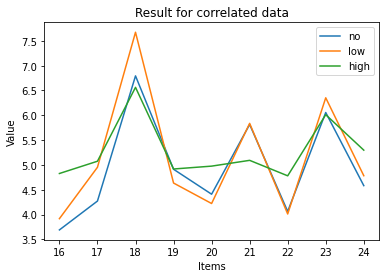

In [ ]:
df_SA = read_csv("Results//SA.csv", index_col=0)
df_SA.plot(title="Result for correlated data", xlabel="Items", ylabel="Value")

### Dane

In [ ]:
df_SA.head(9)

,no,low,high
16,3.690178,3.916876,4.827003
17,4.271999,4.952518,5.074306
18,6.794058,7.673430,6.563229
19,4.912355,4.634945,4.917624
20,4.409648,4.222085,4.975506
21,5.815627,5.837355,5.092031
22,4.063167,4.011114,4.780197
23,6.056065,6.352341,6.012291
24,4.582338,4.782561,5.297451


<AxesSubplot:title={'center':'Result for correlated data'}, xlabel='Items', ylabel='Value'>

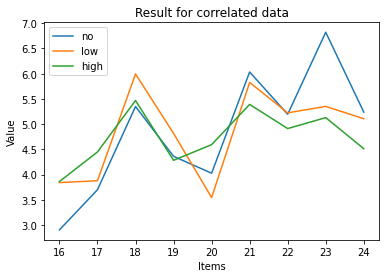

In [ ]:
df_GA = read_csv("Results//GA.csv", index_col=0)
df_GA.plot(title="Result for correlated data", xlabel="Items", ylabel="Value")

In [ ]:
df_GA.head(9)

,no,low,high
16,2.901931,3.840650,3.861181
17,3.698705,3.877263,4.447591
18,5.348981,5.995194,5.467431
19,4.361052,4.815755,4.282067
20,4.026004,3.543675,4.592085
21,6.033231,5.825849,5.390671
22,5.194917,5.222975,4.911434
23,6.821555,5.351203,5.128609
24,5.237358,5.106838,4.511915


<AxesSubplot:title={'center':'Result for correlated data'}, xlabel='Items', ylabel='Value'>

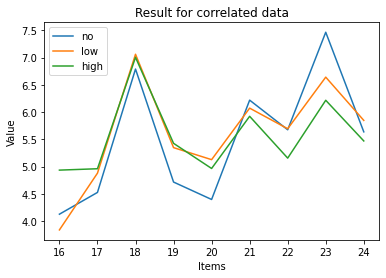

In [ ]:
df_SAGA = read_csv("Results//SAGA.csv", index_col=0)
df_SAGA.plot(title="Result for correlated data", xlabel="Items", ylabel="Value")

In [ ]:
df_SAGA.head(9)

,no,low,high
16,4.125811,3.837242,4.934728
17,4.525494,4.879110,4.960102
18,6.789740,7.061440,7.004848
19,4.715817,5.347431,5.426557
20,4.395976,5.126956,4.964960
21,6.219081,6.072498,5.922402
22,5.675517,5.694195,5.155062
23,7.465483,6.641442,6.216600
24,5.637281,5.847261,5.470162


In [ ]:
### Comparison

<AxesSubplot:title={'center':'Results comparison for no correlated data'}, xlabel='Items', ylabel='Value'>

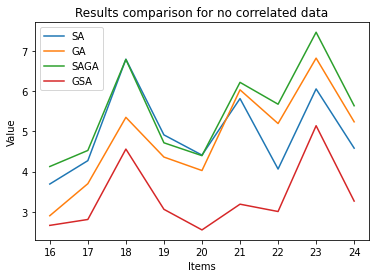

In [ ]:
df_no = concat([df_SA['no'].rename("SA"),df_GA['no'].rename("GA"),df_SAGA['no'].rename("SAGA"), df_GSA['no'].rename("GSA")],axis=1)
df_no.plot(title="Results comparison for no correlated data", xlabel="Items", ylabel="Value")

In [ ]:
df_no.head(9)

,SA,GA,SAGA,GSA
16,3.690178,2.901931,4.125811,2.661599
17,4.271999,3.698705,4.525494,2.808765
18,6.794058,5.348981,6.789740,4.559461
19,4.912355,4.361052,4.715817,3.061225
20,4.409648,4.026004,4.395976,2.548946
21,5.815627,6.033231,6.219081,3.188891
22,4.063167,5.194917,5.675517,3.006683
23,6.056065,6.821555,7.465483,5.140295
24,4.582338,5.237358,5.637281,3.265841


<AxesSubplot:title={'center':'Results comparison for low correlated data'}, xlabel='Items', ylabel='Value'>

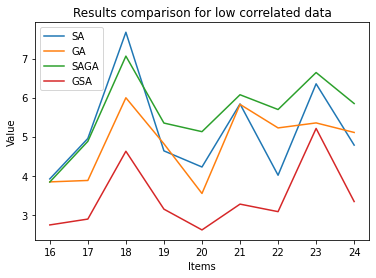

In [ ]:
df_low = concat([df_SA['low'].rename("SA"),df_GA['low'].rename("GA"),df_SAGA['low'].rename("SAGA"), df_GSA['low'].rename("GSA")],axis=1)
df_low.plot(title="Results comparison for low correlated data", xlabel="Items", ylabel="Value")

In [ ]:
df_low.head(9)

,SA,GA,SAGA,GSA
16,3.916876,3.840650,3.837242,2.738031
17,4.952518,3.877263,4.879110,2.888327
18,7.673430,5.995194,7.061440,4.625127
19,4.634945,4.815755,5.347431,3.142394
20,4.222085,3.543675,5.126956,2.610442
21,5.837355,5.825849,6.072498,3.271083
22,4.011114,5.222975,5.694195,3.078406
23,6.352341,5.351203,6.641442,5.209513
24,4.782561,5.106838,5.847261,3.336987


<AxesSubplot:title={'center':'Results comparison for high correlated data'}, xlabel='Items', ylabel='Value'>

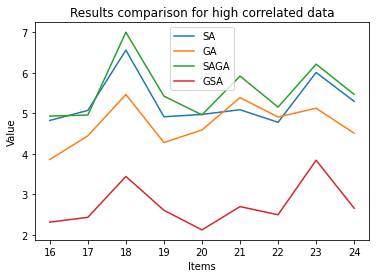

In [ ]:
df_high = concat([df_SA['high'].rename("SA"),df_GA['high'].rename("GA"),df_SAGA['high'].rename("SAGA"), df_GSA['high'].rename("GSA")],axis=1)
df_high.plot(title="Results comparison for high correlated data", xlabel="Items", ylabel="Value")

In [ ]:
df_high.head(9)

,SA,GA,SAGA,GSA
16,4.827003,3.861181,4.934728,2.315148
17,5.074306,4.447591,4.960102,2.434386
18,6.563229,5.467431,7.004848,3.443843
19,4.917624,4.282067,5.426557,2.608845
20,4.975506,4.592085,4.964960,2.123553
21,5.092031,5.390671,5.922402,2.698742
22,4.780197,4.911434,5.155062,2.498366
23,6.012291,5.128609,6.216600,3.844052
24,5.297451,4.511915,5.470162,2.659636


*** DO DODANIA WIECEJ WYNIKOW ***
### Porównanie kilku wyników:

| Data / Algorithm | GSA      | GA       | SA       | SAGA     |
|------------------|----------|----------|----------|----------|
| 16_no_correlated | 2.661599 | 2.901931 | 3.690178 | 4.125811 |
| 17_no_correlated | 2.808765 | 3.698705 | 4.271999 | 4.525494 |
| 18_no_correlated | 4.559461 | 5.348981 | 6.794058 | 6.789740 |
| 19_no_correlated | 3.061225 | 4.361052 | 4.912355 | 4.715817 |


## Podsumowanie

Najlepszym algorytmem w naszych testach okazał się algorytm hybrydowy powstały z połączenia wyżarzania oraz algorytmu genetycznego. Pojedyncze wersje tych algorytmów uzyskały momentami podobne wyniki natomiast charakteryzują się mniejszą stabilnością rozwiązania. Programowanie zachłanne uzyskało zdecydowanie najgorsze wyniki. Najstabilniejsze wyniki dla wszystkich algorytmów uzyskano dla zbioru danych o wysokiej korelacji. Dane o braku lub niskiej korelacji zdestabliziowały algorytm genetyczny oraz wyżarzania.

## Bibliografia